# Model Development 

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [3]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression and Multiple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression 

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
X = df[['highway-mpg']]
Y = df['price']

In [7]:
# Fit  model

lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Output Prediction

Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
# Value of Intercept

lm.intercept_

38423.3058581574

In [10]:
# Value of Slope

lm.coef_

array([-821.73337832])

In [11]:
# Another Object

lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lm1.fit(df[['engine-size']], df['price'])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# Slope 

lm1.coef_

array([166.86001569])

In [14]:
# Intercept

lm1.intercept_

-7963.338906281042

In [15]:
# Equation

# Yhat = -7963.339 + 166.86*X
#OR
# Price = -7963.339 + 166.86*engine_size



In [16]:
# Multiple Linear Regression 

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [17]:
# Fit Model

lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# Intercept

lm.intercept_

-15806.62462632922

In [19]:
# Slope

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [20]:
# Function of above

# Price = -15806.62 + 53.496*horsepower + 4.708*curb-weight + 81.53*engine-size + 36.057*highway-mpg 

In [21]:
# Train model 2

lm2 = LinearRegression()

lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [23]:
lm2.intercept_

38201.31327245728

In [24]:
# Function of above

# Price = 38201.31 + 1.498*normalized-losses - 820.454*highway-mpg

# Model Evaluation using Visualization 

In [25]:
import seaborn as sns
%matplotlib inline 

(0, 48303.60046605151)

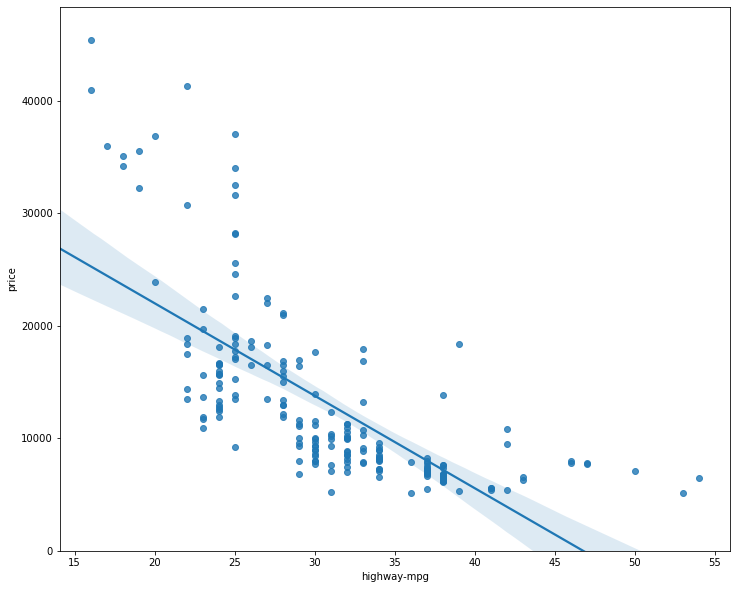

In [26]:
# Visualize horsepower as a potential predictor

width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

(0, 47422.919330307624)

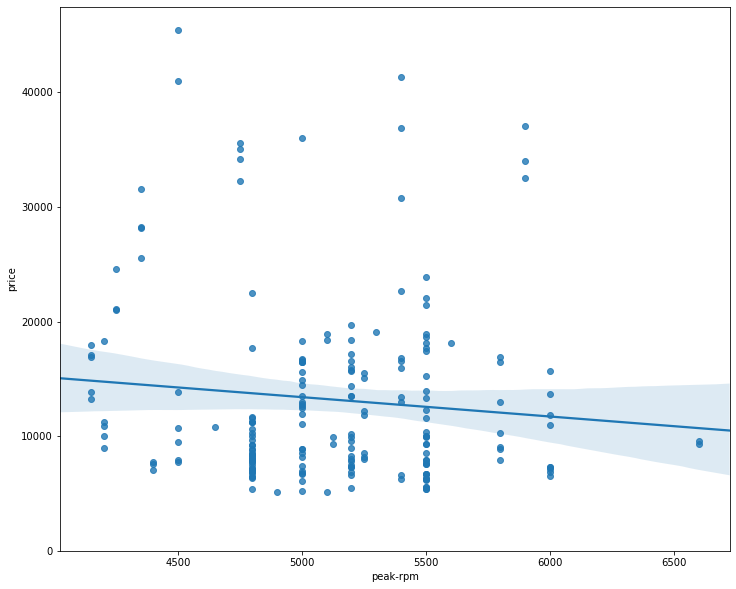

In [27]:
# Compare to 'peak-rpm'

plt.figure(figsize = (width, height))
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)

In [28]:
# use corr() to verify which variable has a stronger correlation to price

df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


# Residual Plot 

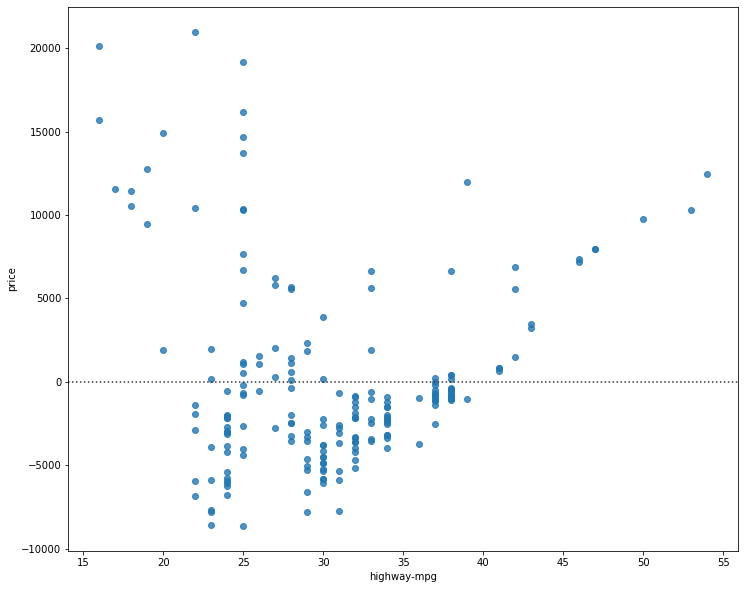

In [29]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [30]:
# Multiple Linear Regression

Y_hat = lm.predict(Z)

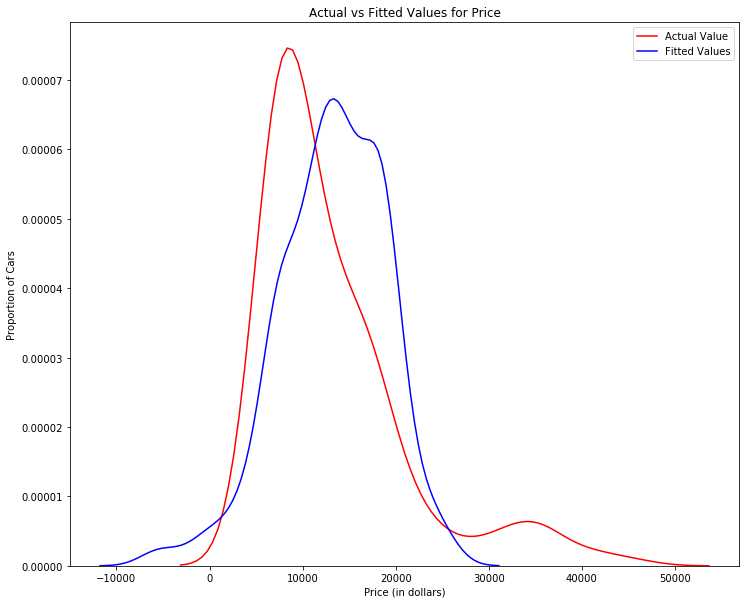

In [31]:
plt.figure(figsize = (width, height))

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

# Polynomial Regression and Pipelines 

In [32]:
def PlotPolly (model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [33]:
# Variables

x = df['highway-mpg']
y = df['price']

In [34]:
# We will use a polynomial of 3rd order (cubic)

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


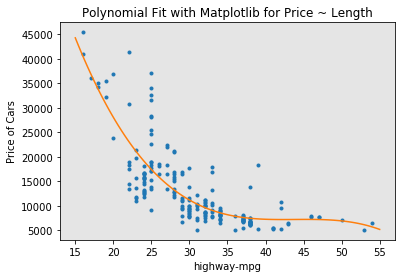

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [35]:
# Plot function

PlotPolly(p, x, y, 'highway-mpg')

np.polyfit(x, y, 3)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


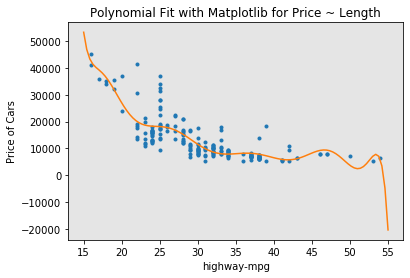

In [36]:
# 11 order polynimial model

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'highway-mpg')

In [37]:
# Multivariate Polynomial 

from sklearn.preprocessing import PolynomialFeatures

In [38]:
# PolynomialFeatures object of degree 2

pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [39]:
Z_pr = pr.fit_transform(Z)

In [40]:
Z.shape

(201, 4)

In [41]:
# After transformation

Z_pr.shape

(201, 15)

# Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

In [43]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [44]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [45]:
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [46]:
ypipe = pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [47]:
Input2 = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input2)

pipe.fit(Z,y)

ypipe = pipe.predict(Z)
ypipe[0:10]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Measures for In-Sample Evaluation 

# Model 1: Simple Linear Regression

In [48]:
#highway_mpg_fit
lm.fit(X, Y)

#R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [49]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


# Model 2: Multiple Linear Regression

In [52]:
# Fit model
lm.fit(Z, df['price'])

#R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [53]:
# MSE
Y_predict_multifit = lm.predict(Z)

In [55]:
print( 'The mean square error of price and predicted value using multifit is: ', \
     mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


# Model 3: Polynomial Fit 

In [56]:
from sklearn.metrics import r2_score

In [58]:
r_squared = r2_score(y, p(x))

print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [60]:
# MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

# Prediction and Decision Making

In [61]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [62]:
# Fit
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
# Produce prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

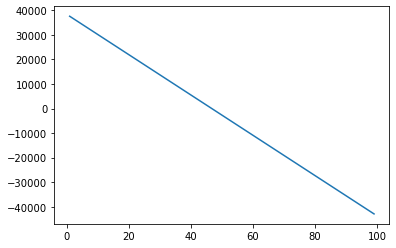

In [64]:
plt.plot(new_input, yhat)
plt.show()